## Generate CMIP Forcing data


In [6]:


# Ignore user warnings :)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Required dependencies
from pathlib import Path
from cartopy.io import shapereader
import pandas as pd
import numpy as np
from rich import print
import xarray as xr
import shutil
import matplotlib.pyplot as plt

import ewatercycle
import ewatercycle.forcing



In [8]:
# The name of the shapefile
shape_file_name = "AralSeaBasin"  # river: Bedford Ouse at Roxton, England

# The path to the shapefiles
shapefile_path =  Path.cwd()/'AralSea_Basin'/ f"{shape_file_name}.shp"  # check this directory yourself!

# The time-window of the experiment
experiment_start_date = "2010-01-01T00:00:00Z"
experiment_end_date = "2010-12-31T00:00:00Z"

# The path save directory of the CMIP data
forcing_path_CMIP = Path.cwd() / "forcing_CMIP_1010" / shape_file_name / "CMIP6"   # we do not use historical here, so we can use this as a default save path later on
forcing_path_CMIP.mkdir(parents=True, exist_ok=True)



In [9]:
Path.home()

PosixPath('/home/avandervee3')

In [10]:


cmip_historical =  {
   'project': 'CMIP6',
   'exp': 'historical',
   'dataset': 'MPI-ESM1-2-HR',
   "ensemble": 'r1i1p1f1',
   'grid': 'gn'
}

CMIP_forcing = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
   dataset=cmip_historical,
   start_time=experiment_start_date,
   end_time=experiment_end_date,
   shape=shapefile_path,
   directory=forcing_path_CMIP / "historical",
)



In [12]:
# Load the generated historical data
historical_CMIP_location = forcing_path_CMIP / "historical" / "work" / "diagnostic" / "script"
historical_CMIP_forcing = ewatercycle.forcing.sources["LumpedMakkinkForcing"].load(directory=historical_CMIP_location)

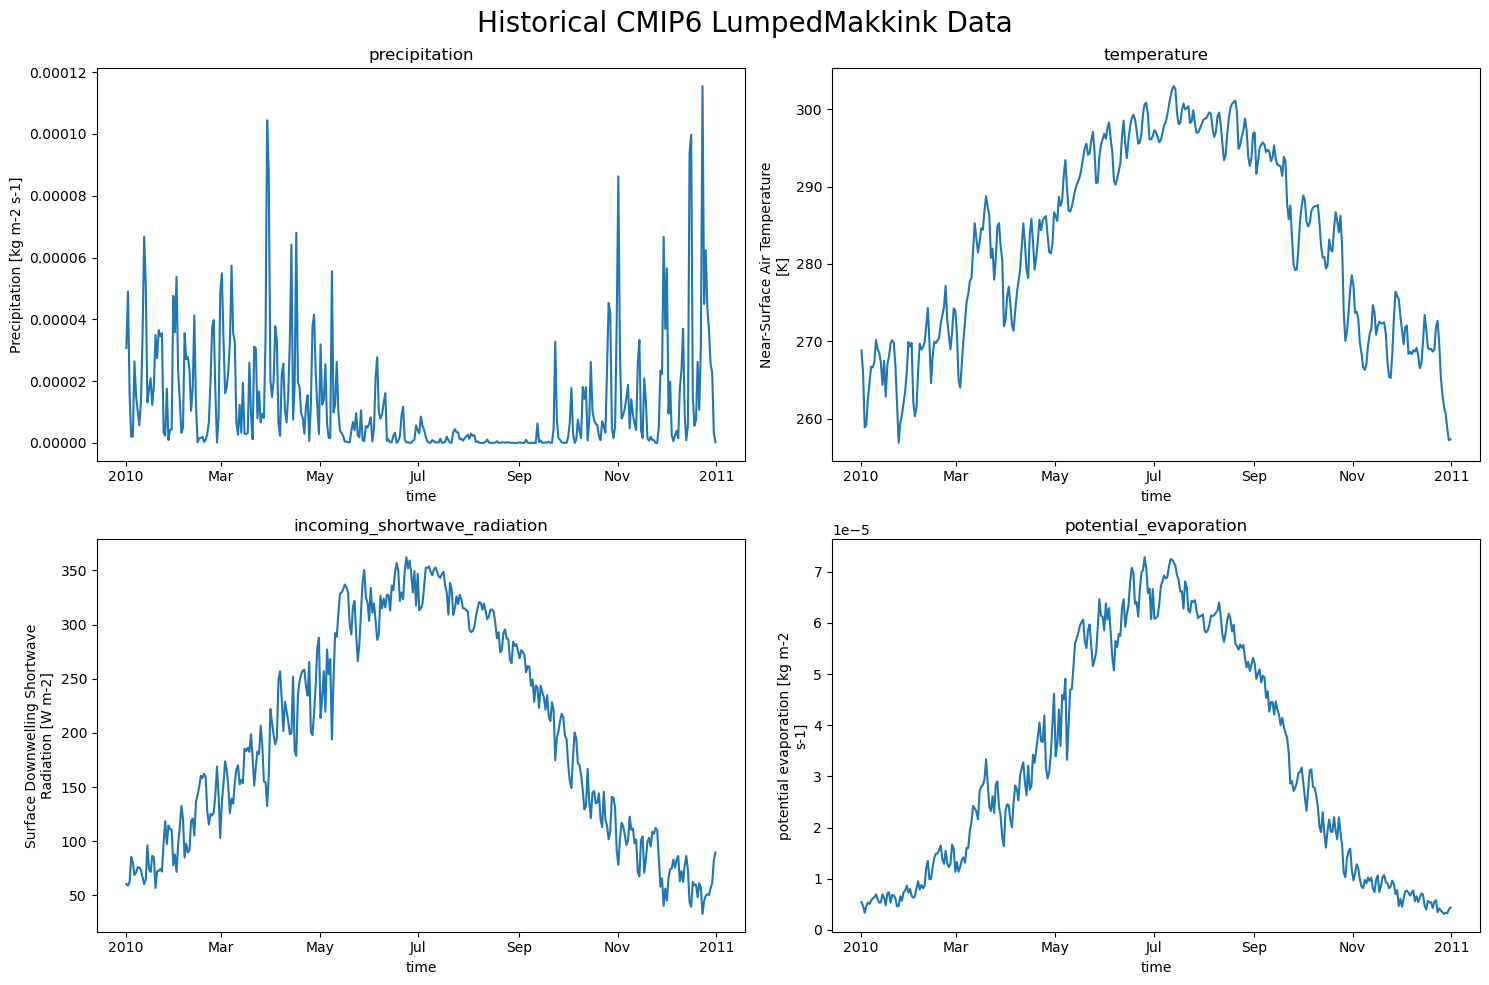

In [13]:
historical_CMIP_data = {'precipitation pr': xr.open_dataset(historical_CMIP_forcing['pr']),
             'temperature tas': xr.open_dataset(historical_CMIP_forcing['tas']),
             'incoming_shortwave_radiation rsds': xr.open_dataset(historical_CMIP_forcing['rsds']),
             'potential_evaporation evspsblpot': xr.open_dataset(historical_CMIP_forcing['evspsblpot'])
}

plot_counter = 1
plt.figure(figsize=(15, 10))
for name, data in historical_CMIP_data.items():
    plt.subplot(2,2, plot_counter)
    data[name.split(" ")[-1]].plot()
    plt.title(f"{name.split(" ")[0]}")
    plot_counter += 1

plt.suptitle("Historical CMIP6 LumpedMakkink Data", fontsize=20)
plt.tight_layout()

In [17]:
esmvaltool_padding = 2

pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset= cmip_historical,
    start_time="2010-01-01T00:00:00Z",
    end_time="2010-12-31T00:00:00Z",
    start_time_climatology="2010-01-01T00:00:00Z",
    end_time_climatology="2010-12-31T00:00:00Z",
    shape=shapefile_path,
    extract_region={
    "start_longitude": 53-esmvaltool_padding,
    "end_longitude": 80+esmvaltool_padding,
    "start_latitude": 34-esmvaltool_padding,
    "end_latitude": 52+esmvaltool_padding,},
    directory = forcing_path_CMIP / "historical" / "PCRGlobWB"

)



Process ForkPoolWorker-8:
Process ForkPoolWorker-7:


KeyboardInterrupt: 